In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error

#os.chdir('C:\\Users\Matthew...')
path = os.getcwd()

df = pd.read_csv('titanic.csv')

In [2]:
#EDA (Exploratory Data Analysis)
#Show head, info, and describe
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [4]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
#detect number of missing values
df.isna().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

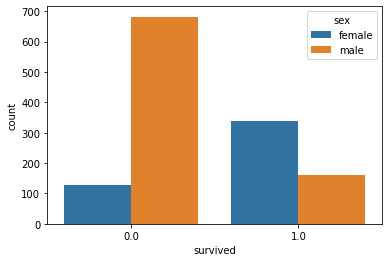

In [6]:
#plot survivors correlation with sex
sns.countplot(x='survived',data=df, hue = "sex")

<AxesSubplot:xlabel='survived', ylabel='count'>

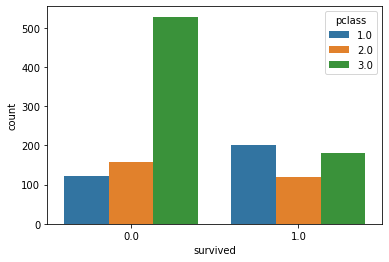

In [7]:
#plot survivors correlation with the ticket class (1st, 2nd, and 3rd)
sns.countplot(x='survived',data=df, hue = "pclass")

<AxesSubplot:>

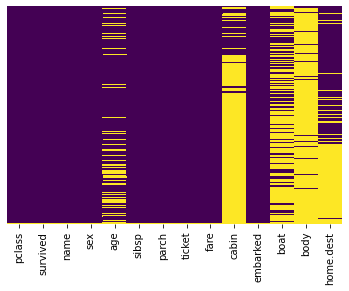

In [8]:
#Show the columns with null values (yellow)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
#Drop the values with high null values no impact
df = df.drop("boat", axis=1)  
df = df.drop("body", axis=1)
df = df.drop('cabin', axis=1)
df = df.drop('home.dest', axis=1)

In [10]:
#Function to process and store an estimated age
def impute_age(cols):   
    Age = cols[0]    
    Pclass = cols[1]       
    if pd.isnull(Age):
        if Pclass == 1:           
            return 37
        elif Pclass == 2:           
            return 29
        else:           
            return 24
    else:        return Age

In [11]:
#Apply function to the age column
df['age'] = df.apply(impute_age, axis=1)

<AxesSubplot:>

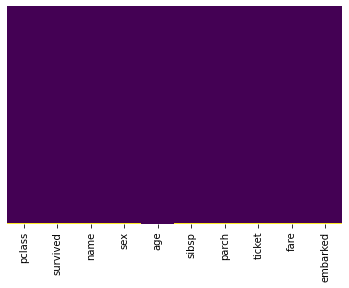

In [12]:
#Now nearly all non-null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
#Drop the non applicable to get all non-null counts shown with info
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   float64
 1   survived  1306 non-null   float64
 2   name      1306 non-null   object 
 3   sex       1306 non-null   object 
 4   age       1306 non-null   float64
 5   sibsp     1306 non-null   float64
 6   parch     1306 non-null   float64
 7   ticket    1306 non-null   object 
 8   fare      1306 non-null   float64
 9   embarked  1306 non-null   object 
dtypes: float64(6), object(4)
memory usage: 112.2+ KB


In [14]:
#Train Test Split
X = pd.get_dummies(df.drop("survived",axis=1),drop_first=True)
y = df["survived"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=(0.3),random_state = 101)

In [16]:
#Calculate error for different number of decision trees
test_error = []
for n in range(1, 60):
    model = RandomForestClassifier(n_estimators=n, max_features = "auto")
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

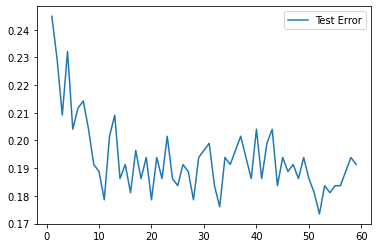

In [17]:
#Plot test error vs the number of decision trees to find the best number of estimators in the forest
plt.plot(range(1,60), test_error, label="Test Error")
plt.legend()

In [18]:
#From the previous model, use 20 estimators and fit to the testing data
model = RandomForestClassifier(n_estimators=20, max_features = "auto", random_state=101)
model.fit(X_train,y_train)
base_preds = model.predict(X_test)

In [19]:
#Show confusion matrix results
confusion_matrix(y_test, base_preds)

array([[236,  11],
       [ 60,  85]], dtype=int64)

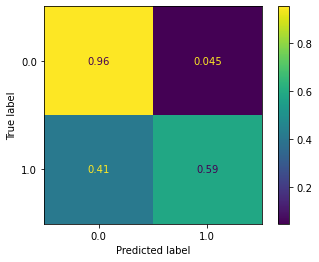

In [20]:
#Plot normalized confusion matrix
plot_confusion_matrix(model, X_test, y_test,normalize = 'true')

In [21]:
#Show weighted feature importances
pd.DataFrame(index=X.columns,data = model.feature_importances_, columns=["Feature Importance"])

,Feature Importance
pclass,0.040218
age,0.015475
sibsp,0.018158
parch,0.019662
fare,0.062363
...,...
ticket_W.E.P. 5734,0.000047
ticket_W/C 14208,0.000004
ticket_WE/P 5735,0.000000
embarked_Q,0.003648


In [22]:
#Show classifcation report
print(classification_report(y_test,base_preds))

              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87       247
         1.0       0.89      0.59      0.71       145

    accuracy                           0.82       392
   macro avg       0.84      0.77      0.79       392
weighted avg       0.83      0.82      0.81       392

